# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []
recommended = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all('div',{'class':'text_content'}):
        reviews.append(para.get_text())
    for rec in parsed_content.find_all('td', {'class': ['review-value rating-yes','review-value rating-no']}):
        recommended.append(rec.get_text())
    print(f'--> {len(reviews)}')
    print(f'--> {len(recommended)}')







Scraping page 1
--> 100
--> 100
Scraping page 2
--> 200
--> 200
Scraping page 3
--> 300
--> 300
Scraping page 4
--> 400
--> 400
Scraping page 5
--> 500
--> 500
Scraping page 6
--> 600
--> 600
Scraping page 7
--> 700
--> 700
Scraping page 8
--> 800
--> 800
Scraping page 9
--> 900
--> 900
Scraping page 10
--> 1000
--> 1000
Scraping page 11
--> 1100
--> 1100
Scraping page 12
--> 1200
--> 1200
Scraping page 13
--> 1300
--> 1300
Scraping page 14
--> 1400
--> 1400
Scraping page 15
--> 1500
--> 1500
Scraping page 16
--> 1600
--> 1600
Scraping page 17
--> 1700
--> 1700
Scraping page 18
--> 1800
--> 1800
Scraping page 19
--> 1900
--> 1900
Scraping page 20
--> 2000
--> 2000
Scraping page 21
--> 2100
--> 2100
Scraping page 22
--> 2200
--> 2200
Scraping page 23
--> 2300
--> 2300
Scraping page 24
--> 2400
--> 2400
Scraping page 25
--> 2500
--> 2500
Scraping page 26
--> 2600
--> 2600
Scraping page 27
--> 2700
--> 2700
Scraping page 28
--> 2800
--> 2800
Scraping page 29
--> 2900
--> 2900
Scraping pag

In [3]:
df = pd.DataFrame({'reviews':reviews,'recommended':recommended})

here dataframe created with columns reviews and recommended.

In [4]:
df.head()

,reviews,recommended
0,✅ Trip Verified | First time flying with Briti...,yes
1,✅ Trip Verified | The latest affront. Stood i...,no
2,Not Verified | Booked a flight return flight ...,no
3,✅ Trip Verified | I tried to check in on line...,no
4,✅ Trip Verified | A catalogue of failures. We...,no


In [7]:
df.shape

(3000, 2)

In [5]:
import re
import nltk
import time
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/mush/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
start = time.time_ns()

In [8]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]','', text)

    tokens = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    text = ' '.join(tokens)

    return text



In [9]:
df.reviews = df.reviews.apply(preprocess_text)

In [10]:
df

,reviews,recommended
0,trip verified first time flying british airway...,yes
1,trip verified latest affront stood first class...,no
2,verified booked flight return flight london mu...,no
3,trip verified tried check line informed possib...,no
4,trip verified catalogue failure flew belfast h...,no
...,...,...
2995,flew toronto manchester via t5 heathrow dec 17...,yes
2996,flew lhr denver colorado 261214 6115 ski holid...,no
2997,travel ba sucker avios point based london genu...,yes
2998,flying iberia madscl return journey buenos air...,no


In [12]:
df.reviews =  df.reviews.str.replace('trip Verified','')
df.reviews =  df.reviews.str.replace('verified','')

In [13]:
preprocessed_reviews = df.reviews

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(preprocessed_reviews)

In [33]:
print(x.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
def res(x):
    if x== 'yes': return 1
    if x== 'no': return 0



In [17]:
df.recommended = df.recommended.apply(res)

In [19]:
y = df.recommended

In [21]:
df.recommended.value_counts()

0    1825
1    1175
Name: recommended, dtype: int64

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

y_pred = nb.predict(x_test)


accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy {accuracy}')
print(f'Precision {precision}')
print(f'recall {recall}')
print(f'f1 {f1}')



Accuracy 0.7866666666666666
Precision 0.8381620600047248
recall 0.7866666666666666
f1 0.7613876698014628


Text(0.5, 58.7222222222222, 'Predicted class')

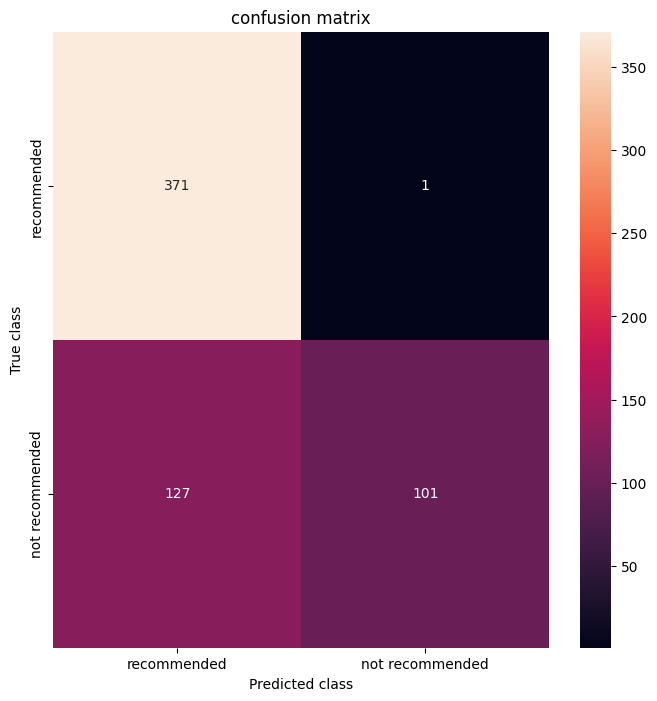

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
confus_matrix = confusion_matrix(y_test,y_pred)
labels = ['recommended', 'not recommended']
plt.figure(figsize=(8,8))
sns.heatmap(confus_matrix,xticklabels=labels,yticklabels=labels,annot = True,fmt='d')
plt.title('confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [23]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(x_train, y_train)

Learning rate set to 0.007929
0:	total: 368ms	remaining: 12m 14s
1:	total: 565ms	remaining: 9m 24s
2:	total: 781ms	remaining: 8m 39s
3:	total: 979ms	remaining: 8m 8s
4:	total: 1.19s	remaining: 7m 56s
5:	total: 1.42s	remaining: 7m 50s
6:	total: 1.67s	remaining: 7m 54s
7:	total: 1.9s	remaining: 7m 52s
8:	total: 2.14s	remaining: 7m 52s
9:	total: 2.35s	remaining: 7m 47s
10:	total: 2.56s	remaining: 7m 42s
11:	total: 2.78s	remaining: 7m 40s
12:	total: 2.99s	remaining: 7m 37s
13:	total: 3.21s	remaining: 7m 35s
14:	total: 3.41s	remaining: 7m 31s
15:	total: 3.63s	remaining: 7m 29s
16:	total: 3.83s	remaining: 7m 27s
17:	total: 4.05s	remaining: 7m 25s
18:	total: 4.25s	remaining: 7m 23s
19:	total: 4.47s	remaining: 7m 23s
20:	total: 4.67s	remaining: 7m 20s
21:	total: 4.9s	remaining: 7m 20s
22:	total: 5.09s	remaining: 7m 17s
23:	total: 5.34s	remaining: 7m 19s
24:	total: 5.56s	remaining: 7m 19s
25:	total: 5.77s	remaining: 7m 18s
26:	total: 6.04s	remaining: 7m 21s
27:	total: 6.3s	remaining: 7m 24s
28:

In [24]:
y_pred_cat = cat.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy {accuracy}')
print(f'Precision {precision}')
print(f'recall {recall}')
print(f'f1 {f1}')


Accuracy 0.7866666666666666
Precision 0.8381620600047248
recall 0.7866666666666666
f1 0.7613876698014628


In [25]:
new_review = "Flight from Heathrow to Newark. The new Dreamliner was fantastic. Very comfortable quiet and clean. The cabin crew were superb very professional with customer service being their priority. I appreciate that flying on a new aircraft makes a difference to the flight however if BA continue to invest in their fleet and maintain and excellent level of customer service I can see no other reason to fly with another carrier especially when considering BA's avios points usage which allows all of your points to be spent on flights. Virgin however dictate how many points you can spend on each flight. I've flown with BA and Virgin many times it was a nice attempt by Virgin advertising themselves in terminal 5 however when you're sat in terminal 5 after experiencing a quick and easy run through the terminal about to board a brand new aircraft it's hard to see the advertisements working."
preprocessed_review = preprocess_text(new_review)
X_new = vectorizer.transform([preprocessed_review])
predicted_sentiment = cat.predict(X_new)[0]

print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: 1
